<a href="https://colab.research.google.com/github/EvitaRindani/Recsys/blob/main/Zero_shot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import pandas as pd
import regex as re
from bs4 import BeautifulSoup

In [13]:
df=pd.read_parquet("https://storage.googleapis.com/kgdata-kompas-general/evita/aiml_tag1day")

In [14]:
df

,id,site,section,content
0,20220901190947374,GO,Business,"<p><!--img.1--><br /><strong>JAKARTA, KOMPAS.c..."
1,20220901145200984,AGRI,Varietas Tanaman,"<p><!--img.1--></p>\n<p><strong>JAKARTA, KOMPA..."
2,20220901141800384,AGRI,Varietas Tanaman,"<p><!--img.1--></p>\n<p><strong>JAKARTA, KOMPA..."
3,20220901180052784,AGRI,Tips,"<p><!--img.1--></p>\n<p><strong>JAKARTA, KOMPA..."
4,20220901114729884,AGRI,Tips,"<p><!--img.1--></p>\n<p><strong>JAKARTA, KOMPA..."
...,...,...,...,...
1175,20220901070920220,LIFESTYLE,Eat Good,<p><strong><!--img.1-->KOMPAS.com</strong> - P...
1176,20220901111639528,ADVERTORIAL,Kompas Advertorial,<p><!--img.1--></p>\n<p><strong>KOMPAS.com</st...
1177,20220901155039028,ADVERTORIAL,Kompas Advertorial,<p><!--img.1--></p>\n<p><strong>KOMPAS.com </s...
1178,20220901090000928,ADVERTORIAL,Kompas Advertorial,<p><!--img.1--></p>\n<p><strong>KOMPAS.com</st...


In [15]:
# Function to remove tags
def remove_tags(html):
  
    # parse html content
    soup = BeautifulSoup(html, "html.parser")
  
    for data in soup(['style', 'script']):
        # Remove tags
        data.decompose()
  
    # return data by retrieving the tag content
    return ' '.join(soup.stripped_strings)
  

df['clean'] = df['content'].apply(str).apply(remove_tags)
df['clean']    

0       JAKARTA, KOMPAS.com - The Indonesian governmen...
1       JAKARTA, KOMPAS.com - Menanam sayuran dan bumb...
2       JAKARTA, KOMPAS.con - Durian monthong atau dur...
3       JAKARTA, KOMPAS.com - Salah satu langkah penti...
4       JAKARTA, KOMPAS.com - Pisang adalah buah yang ...
                              ...                        
1175    KOMPAS.com - Pentingnya menerapkan gaya hidup ...
1176    KOMPAS.com - Balai Diklat Tambang Bawah Tanah ...
1177    KOMPAS.com - Menteri Pertahanan (Menhan) Repub...
1178    KOMPAS.com – Berlibur menggunakan kapal pesiar...
1179    KOMPAS.com - Minat investor terhadap sukuk rit...
Name: clean, Length: 1180, dtype: object

In [16]:
#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

df['clean'] = df['clean'].apply(remove_number)
df['clean']

0       JAKARTA, KOMPAS.com - The Indonesian governmen...
1       JAKARTA, KOMPAS.com - Menanam sayuran dan bumb...
2       JAKARTA, KOMPAS.con - Durian monthong atau dur...
3       JAKARTA, KOMPAS.com - Salah satu langkah penti...
4       JAKARTA, KOMPAS.com - Pisang adalah buah yang ...
                              ...                        
1175    KOMPAS.com - Pentingnya menerapkan gaya hidup ...
1176    KOMPAS.com - Balai Diklat Tambang Bawah Tanah ...
1177    KOMPAS.com - Menteri Pertahanan (Menhan) Repub...
1178    KOMPAS.com – Berlibur menggunakan kapal pesiar...
1179    KOMPAS.com - Minat investor terhadap sukuk rit...
Name: clean, Length: 1180, dtype: object

In [17]:
df["clean"] = df["clean"].apply(lambda x:x.replace("-", " ").replace("/", " "))

In [18]:
import string 
import re #regex library
import nltk
nltk.download('punkt')

# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

# ------ Tokenizing ---------

def remove_content_special(text):
    # remove tab, new line, ans back slice
    text = str(text).replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
     # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
df['clean'] = df['clean'].apply(remove_content_special)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))
    
df['clean'] = df['clean'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

df['clean'] = df['clean'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

df['clean'] = df['clean'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

df['clean'] = df['clean'].apply(remove_singl_char)

print(' Result : \n') 
print(df['clean'].head())
print('\n\n\n')    

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


 Result : 

0    JAKARTA KOMPAScom The Indonesian government ha...
1    JAKARTA KOMPAScom Menanam sayuran dan bumbu da...
2    JAKARTA KOMPAScon Durian monthong atau durian ...
3    JAKARTA KOMPAScom Salah satu langkah penting p...
4    JAKARTA KOMPAScom Pisang adalah buah yang memi...
Name: clean, dtype: object






In [19]:
df.head()

,id,site,section,content,clean
0,20220901190947374,GO,Business,"<p><!--img.1--><br /><strong>JAKARTA, KOMPAS.c...",JAKARTA KOMPAScom The Indonesian government ha...
1,20220901145200984,AGRI,Varietas Tanaman,"<p><!--img.1--></p>\n<p><strong>JAKARTA, KOMPA...",JAKARTA KOMPAScom Menanam sayuran dan bumbu da...
2,20220901141800384,AGRI,Varietas Tanaman,"<p><!--img.1--></p>\n<p><strong>JAKARTA, KOMPA...",JAKARTA KOMPAScon Durian monthong atau durian ...
3,20220901180052784,AGRI,Tips,"<p><!--img.1--></p>\n<p><strong>JAKARTA, KOMPA...",JAKARTA KOMPAScom Salah satu langkah penting p...
4,20220901114729884,AGRI,Tips,"<p><!--img.1--></p>\n<p><strong>JAKARTA, KOMPA...",JAKARTA KOMPAScom Pisang adalah buah yang memi...


In [20]:
df['total_char'] = df.clean.apply(len)
df.head()

,id,site,section,content,clean,total_char
0,20220901190947374,GO,Business,"<p><!--img.1--><br /><strong>JAKARTA, KOMPAS.c...",JAKARTA KOMPAScom The Indonesian government ha...,1651
1,20220901145200984,AGRI,Varietas Tanaman,"<p><!--img.1--></p>\n<p><strong>JAKARTA, KOMPA...",JAKARTA KOMPAScom Menanam sayuran dan bumbu da...,4025
2,20220901141800384,AGRI,Varietas Tanaman,"<p><!--img.1--></p>\n<p><strong>JAKARTA, KOMPA...",JAKARTA KOMPAScon Durian monthong atau durian ...,5337
3,20220901180052784,AGRI,Tips,"<p><!--img.1--></p>\n<p><strong>JAKARTA, KOMPA...",JAKARTA KOMPAScom Salah satu langkah penting p...,6340
4,20220901114729884,AGRI,Tips,"<p><!--img.1--></p>\n<p><strong>JAKARTA, KOMPA...",JAKARTA KOMPAScom Pisang adalah buah yang memi...,9108


In [21]:
df['total_word'] = df.clean.apply(lambda sent: len(sent.split()))
df.head()

,id,site,section,content,clean,total_char,total_word
0,20220901190947374,GO,Business,"<p><!--img.1--><br /><strong>JAKARTA, KOMPAS.c...",JAKARTA KOMPAScom The Indonesian government ha...,1651,264
1,20220901145200984,AGRI,Varietas Tanaman,"<p><!--img.1--></p>\n<p><strong>JAKARTA, KOMPA...",JAKARTA KOMPAScom Menanam sayuran dan bumbu da...,4025,627
2,20220901141800384,AGRI,Varietas Tanaman,"<p><!--img.1--></p>\n<p><strong>JAKARTA, KOMPA...",JAKARTA KOMPAScon Durian monthong atau durian ...,5337,762
3,20220901180052784,AGRI,Tips,"<p><!--img.1--></p>\n<p><strong>JAKARTA, KOMPA...",JAKARTA KOMPAScom Salah satu langkah penting p...,6340,909
4,20220901114729884,AGRI,Tips,"<p><!--img.1--></p>\n<p><strong>JAKARTA, KOMPA...",JAKARTA KOMPAScom Pisang adalah buah yang memi...,9108,1307


In [22]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


id                    inf
total_char    2700.349153
total_word     391.893220
dtype: float64

In [23]:
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


id            2.022090e+16
total_char    2.400500e+03
total_word    3.485000e+02
dtype: float64

In [24]:
df['total_char'].mode()

0    2163
dtype: int64

In [25]:
df['total_word'].mode()

0    287
dtype: int64

In [26]:
range_total_word = df.total_word.max()-df.total_word.min()
range_total_word

1467

In [27]:
range_total_char = df.total_char.max()-df.total_char.min()
range_total_char

10426

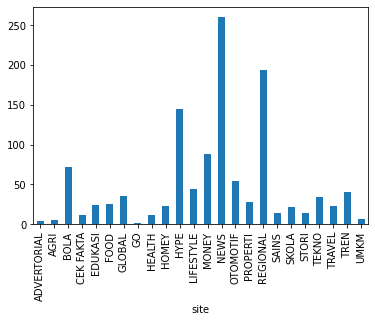

In [28]:
df.groupby('site').site.count().plot(kind='bar')

In [29]:
df_f = df[['site','clean']]
df_f.head()

,site,clean
0,GO,JAKARTA KOMPAScom The Indonesian government ha...
1,AGRI,JAKARTA KOMPAScom Menanam sayuran dan bumbu da...
2,AGRI,JAKARTA KOMPAScon Durian monthong atau durian ...
3,AGRI,JAKARTA KOMPAScom Salah satu langkah penting p...
4,AGRI,JAKARTA KOMPAScom Pisang adalah buah yang memi...


In [30]:
#remove stopword indo
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

list_stopwords = stopwords.words('indonesian')
print(len(list_stopwords))

list_stopwords.extend(["yang", "dengan",'kalo','untuk', 'di', 'dan','lagi',
                       'kalo', 'biar', 'bikin', 'bilang', 'ini','ada','tak',
                       'gak', 'ga', 'karena', 'nya', 'nih', 'sih','jika',
                       'si', 'tau', 'tidak', 'tuh', 'ya', 'dari','itu','agar',
                       'jadi', 'jangan', 'sudah', 'aja', 'ke','saat','pada',
                      'hehe',  'loh', 'yah'])
len(list_stopwords)
# txt_stopword = pd.read_csv("/content/drive/My Drive/sentiment/stopword.txt", names= ["stopword"], header = None)
# list_stopwords.extend(txt_stopword["stopword"][0].split(' '))
# len(list_stopwords)


wordnet_lemmatizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'[a-z]+')
#stop_words = set(stopwords.words('indonesian'))
list_stopwords = set(list_stopwords)

def preprocess(document):
    document = document.lower() # Convert to lowercase
    words = tokenizer.tokenize(document) # Tokenize
    words = [w for w in words if not w in list_stopwords] # Removing stopwords
    # Lemmatizing
    for pos in [wordnet.NOUN, wordnet.VERB, wordnet.ADJ, wordnet.ADV]:
        words = [wordnet_lemmatizer.lemmatize(x, pos) for x in words]
    return " ".join(words)

print("Setup Complete")

758
Setup Complete


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
df_f['text'] = df_f['clean'].apply(preprocess)

df_f.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,site,clean,text
0,GO,JAKARTA KOMPAScom The Indonesian government ha...,jakarta kompascom the indonesian government ha...
1,AGRI,JAKARTA KOMPAScom Menanam sayuran dan bumbu da...,jakarta kompascom menanam sayuran bumbu dapur ...
2,AGRI,JAKARTA KOMPAScon Durian monthong atau durian ...,jakarta kompascon durian monthong durian monto...
3,AGRI,JAKARTA KOMPAScom Salah satu langkah penting p...,jakarta kompascom salah langkah perawatan tana...
4,AGRI,JAKARTA KOMPAScom Pisang adalah buah yang memi...,jakarta kompascom pisang buah memiliki manfaat...


In [32]:
df_f = df_f[['site','text']]
df_f.head()

,site,text
0,GO,jakarta kompascom the indonesian government ha...
1,AGRI,jakarta kompascom menanam sayuran bumbu dapur ...
2,AGRI,jakarta kompascon durian monthong durian monto...
3,AGRI,jakarta kompascom salah langkah perawatan tana...
4,AGRI,jakarta kompascom pisang buah memiliki manfaat...


In [33]:
#remove stopwords english
def textPreprocessing(dclust):
    #Remove Punctuation Logic
    import string
    removePunctuation = [char for char in dclust if char not in string.punctuation]
    #Join Chars to form sentences
    sentenceWithoutPunctuations = ''.join(removePunctuation)
    words = sentenceWithoutPunctuations.split()
    #StopwordRemoval
    from nltk.corpus import stopwords
    removeStopwords = [word for word in words if word.lower() not in stopwords.words('english')]
    
    return removeStopwords

In [34]:
df_f.groupby('site').describe()

text                                                            \
            count unique                                                top   
site                                                                          
ADVERTORIAL     4      4  kompascom balai diklat tambang tanah bdtbt saw...   
AGRI            5      5  jakarta kompascom menanam sayuran bumbu dapur ...   
BOLA           72     72  kompascom juventus berhasil memperbaiki posisi...   
CEK FAKTA      12     12  kompascom badan kelautan atmosfer nasional noa...   
EDUKASI        24     24  kompascom kementerian pendidikan kebudayaan ri...   
FOOD           25     25  kompascom greenfields indonesia memperluas pro...   
GLOBAL         36     36  washington dc kompascom salah penyebab perang ...   
GO              1      1  jakarta kompascom the indonesian government ha...   
HEALTH         12     12  kompascom munculnya benjolan tubuh gejala hern...   
HOMEY          23     23  jakarta kompascom warna cat eksterior menonjol...   
HYPE          145    145  jakarta kompascom september artis indonesia be...   
LIFESTYLE      44     44  kompascom citarasa masakan pedas meningkatkan ...   
MONEY          88     88  jakarta kompascom daftar bank bri daftar brimo...   
NEWS          260    260  jakarta kompascom wakil sekretaris jenderal pa...   
OTOMOTIF       54     54  jakarta kompascom po sinar jaya ambil unit bus...   
PROPERTI       28     28  jakarta kompascom menteri keuangan sri mulyani...   
REGIONAL      193    193  badung kompascom pria berinisial k singaraja b...   
SAINS          14     14  kompascom kelenjar tiroid aktif hipertiroid me...   
SKOLA          22     22  kompascom indonesia salah negara kepulauan ter...   
STORI          14     14  kompascom singasari kerajaan bercorak hindu bu...   
TEKNO          34     34  kompascom ambisi whatsapp superapp kian nyata ...   
TRAVEL         23     23  kompascom orangtua gemar mendaki usia anak gun...   
TREN           41     41  kompascom harga bahan bakar minyak bbm subsidi...   
UMKM            6      6  jakarta kompascom menteri koperasi usaha menen...   

                  
            freq  
site              
ADVERTORIAL    1  
AGRI           1  
BOLA           1  
CEK FAKTA      1  
EDUKASI        1  
FOOD           1  
GLOBAL         1  
GO             1  
HEALTH         1  
HOMEY          1  
HYPE           1  
LIFESTYLE      1  
MONEY          1  
NEWS           1  
OTOMOTIF       1  
PROPERTI       1  
REGIONAL       1  
SAINS          1  
SKOLA          1  
STORI          1  
TEKNO          1  
TRAVEL         1  
TREN           1  
UMKM           1

In [35]:
#Text preprocessing
df_f['text'].head(5).apply(textPreprocessing)

0    [jakarta, kompascom, indonesian, government, h...
1    [jakarta, kompascom, menanam, sayuran, bumbu, ...
2    [jakarta, kompascon, durian, monthong, durian,...
3    [jakarta, kompascom, salah, langkah, perawatan...
4    [jakarta, kompascom, pisang, buah, memiliki, m...
Name: text, dtype: object

In [37]:
# Prepare training corpus ke 1 kumpulan string
train_string = " ".join(df_f['text'])
print(f"***** Extract of train_string ***** \n{train_string[:101]}", "\n")# Split train_corpus by spasi
splits = train_string.split()  
print(f"***** Extract of splits ***** \n{splits[:18]}\n")

***** Extract of train_string ***** 
jakarta kompascom the indonesian government ha forecast the national economy to grow by above five pe 

***** Extract of splits ***** 
['jakarta', 'kompascom', 'the', 'indonesian', 'government', 'ha', 'forecast', 'the', 'national', 'economy', 'to', 'grow', 'by', 'above', 'five', 'percent', 'in', 'the']



In [38]:
print(f"Number of strings: {len(splits)}")
print(f"Number of unique strings: {len(set(splits))}")

Number of strings: 290604
Number of unique strings: 26427


In [39]:
freq_splits = FreqDist(splits)
print(f"***** 10 most common strings ***** \n{freq_splits.most_common(10)}", "\n")

***** 10 most common strings ***** 
[('baca', 3385), ('rp', 2095), ('kompascom', 1507), ('indonesia', 1361), ('jakarta', 1214), ('orang', 1177), ('korban', 1105), ('harga', 1001), ('the', 997), ('anak', 835)] 



In [46]:
short = set(s for s in splits if len(s)<3)
short = [(s, freq_splits[s]) for s in short]
short.sort(key=lambda x:x[1], reverse=True)
short
resultwords= [word for word in df_f['text'] if word.lower() not in short]
df_f['short'] = ' '.join(resultwords)

In [47]:
df_f

,site,text,short
0,GO,jakarta kompascom the indonesian government ha...,jakarta kompascom the indonesian government ha...
1,AGRI,jakarta kompascom menanam sayuran bumbu dapur ...,jakarta kompascom the indonesian government ha...
2,AGRI,jakarta kompascon durian monthong durian monto...,jakarta kompascom the indonesian government ha...
3,AGRI,jakarta kompascom salah langkah perawatan tana...,jakarta kompascom the indonesian government ha...
4,AGRI,jakarta kompascom pisang buah memiliki manfaat...,jakarta kompascom the indonesian government ha...
...,...,...,...
1175,LIFESTYLE,kompascom menerapkan gaya hidup sehat digaungk...,jakarta kompascom the indonesian government ha...
1176,ADVERTORIAL,kompascom balai diklat tambang tanah bdtbt saw...,jakarta kompascom the indonesian government ha...
1177,ADVERTORIAL,kompascom menteri pertahanan menhan republik i...,jakarta kompascom the indonesian government ha...
1178,ADVERTORIAL,kompascom berlibur kapal pesiar cruise opsi va...,jakarta kompascom the indonesian government ha...


In [41]:
long = set(s for s in splits if len(s)>15)
long = [(s, freq_splits[s]) for s in long]
long.sort(key=lambda x:x[1], reverse=True)
long

#exclude dari data

[('mempertimbangkan', 21),
 ('merekomendasikan', 20),
 ('mengimplementasikan', 17),
 ('menyelenggarakan', 17),
 ('subsiditepatmypertaminaid', 13),
 ('direkomendasikan', 11),
 ('mengidentifikasi', 9),
 ('pertanggungjawaban', 8),
 ('jakartakompascom', 8),
 ('kegotongroyongan', 7),
 ('cekbansoskemensosgoid', 6),
 ('diimplementasikan', 6),
 ('coronajakartagoid', 5),
 ('kesehatanstasiun', 5),
 ('menginstruksikan', 5),
 ('terselenggaranya', 5),
 ('tribunjakartacom', 4),
 ('dilatarbelakangi', 4),
 ('mempertanggungjawabkan', 4),
 ('mengembangkannya', 4),
 ('bsubpjsketenagakerjaangoid', 4),
 ('kemendikbudristek', 4),
 ('operasionalisasi', 4),
 ('menginformasikan', 3),
 ('mempermasalahkan', 3),
 ('wwwintothelightidorg', 3),
 ('mengintegrasikan', 3),
 ('ketidakprofesionalan', 3),
 ('wwwjimbrickmanjakartacom', 3),
 ('bertanggungjawab', 3),
 ('cagarbudayakemdikbudgoid', 2),
 ('jatinegarakecamatan', 2),
 ('pertanggungjawabkan', 2),
 ('gastroenterologi', 2),
 ('permendikbudristek', 2),
 ('noooooooooo

In [ ]:
stop_words = set(stopwords.words('indonesian'))

df_f['sastrawi']= [w for w in df_f['clean'] if not w in stop_words]

TypeError: ignored

In [ ]:
df_f

,site,clean,sastrawi
0,GO,JAKARTA KOMPAScom The Indonesian government ha...,JAKARTA KOMPAScom The Indonesian government ha...
1,AGRI,JAKARTA KOMPAScom Menanam sayuran dan bumbu da...,JAKARTA KOMPAScom Menanam sayuran dan bumbu da...
2,AGRI,JAKARTA KOMPAScon Durian monthong atau durian ...,JAKARTA KOMPAScon Durian monthong atau durian ...
3,AGRI,JAKARTA KOMPAScom Salah satu langkah penting p...,JAKARTA KOMPAScom Salah satu langkah penting p...
4,AGRI,JAKARTA KOMPAScom Pisang adalah buah yang memi...,JAKARTA KOMPAScom Pisang adalah buah yang memi...
...,...,...,...
1175,LIFESTYLE,KOMPAScom Pentingnya menerapkan gaya hidup seh...,KOMPAScom Pentingnya menerapkan gaya hidup seh...
1176,ADVERTORIAL,KOMPAScom Balai Diklat Tambang Bawah Tanah BDT...,KOMPAScom Balai Diklat Tambang Bawah Tanah BDT...
1177,ADVERTORIAL,KOMPAScom Menteri Pertahanan Menhan Republik I...,KOMPAScom Menteri Pertahanan Menhan Republik I...
1178,ADVERTORIAL,KOMPAScom Berlibur menggunakan kapal pesiar at...,KOMPAScom Berlibur menggunakan kapal pesiar at...


In [ ]:
freq_kata_1 = nltk.FreqDist(df_f['clean'])
freq_kata_2 = nltk.FreqDist(df_f['sastrawi'])
print(freq_kata_1.most_common(20))
print()
print(freq_kata_2.most_common(20))

[('JAKARTA KOMPAScom The Indonesian government has forecast the national economy to grow by above five percent in the third quarter  of We predict the growth will remain high in the third quarter because of low baseline in the third quarter last year due to the Delta variant of Covid Hence the government predicts it will be above five percent Finance Minister Sri Mulyani Indrawati said during  meeting with the House of Representatives in Jakarta on Wednesday Aug The Indonesian economy has grown by above five percent so far this year She said that overall the economic growth is expected to reach percent in Also read Indonesias Export Growth Greatly Increases in October To achieve the target this year she added the government will continue to maintain the economy to grow by above five percent including in the fourth quarter The minister further predicted economic growth to increase slightly to percent next year which is almost the same as the forecast by various international institution

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 4.2 MB/s 
     |████████████████████████████████| 6.6 MB 824 kB/s 
     |████████████████████████████████| 120 kB 77.9 MB/s 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from transformers import pipeline
from pylab import rcParams

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

In [ ]:
rcParams['figure.figsize'] = 10, 5

In [ ]:
zero_shot_classifier = pipeline("zero-shot-classification")

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
result = zero_shot_classifier(
    sequences = '''"Saat ini pemerintah membuat keputusan dalam situasi yang sulit. Ini adalah pilihan terakhir pemerintah yaitu mengalihkan subsidi BBM sehingga harga beberapa jenis BBM akan mengalami penyesuaian," kata Jokowi, dalam Youtube Sekretariat Presiden (3/9/2022). Bisa dibilang masyarakat Indonesia kena prank pemerintah karena mengira BBM bakal naik pada awal bulan, atau pada Kamis (1/9/2022). Biasanya masyarakat punya tradisi mengisi BBM sampai penuh dengan harga lama, sebelum harga baru berlaku esok harinya.

Artikel ini telah tayang di Kompas.com dengan judul "Ada Fenomena Antrean Kendaraan di SPBU, Beli BBM Bisa 20 Menit", Klik untuk baca: https://otomotif.kompas.com/read/2022/09/22/070200215/ada-fenomena-antrean-kendaraan-di-spbu-beli-bbm-bisa-20-menit.
Penulis : Dio Dananjaya
Editor : Agung Kurniawan

Download aplikasi Kompas.com untuk akses berita lebih mudah dan cepat:
Android: https://bit.ly/3g85pkA
iOS: https://apple.co/3hXWJ0L''',
    candidate_labels=["Flight Travel","Cabs Travel", "Food","Movies"],
    multi_class = True
)


The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


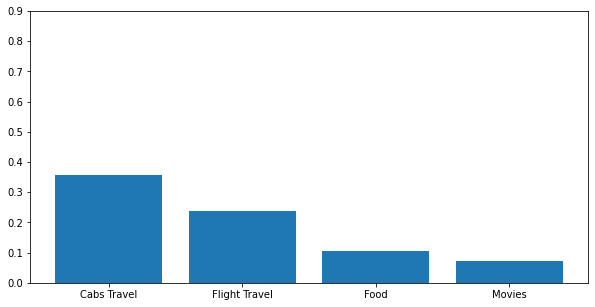

In [ ]:
plt.bar(result["labels"], result["scores"])
plt.yticks(list(np.arange(0, 1 ,0.1)))
plt.show()

In [ ]:
!pip install flair

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 401 kB 4.5 MB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
     |████████████████████████████████| 981 kB 57.5 MB/s 
     |████████████████████████████████| 788 kB 47.1 MB/s 
     |████████████████████████████████| 19.7 MB 2.9 MB/s 
     |████████████████████████████████| 46 kB 4.4 MB/s 
     |████████████████████████████████| 1.6 MB 59.9 MB/s 
     |████████████████████████████████| 1.2 MB 70.7 MB/s 
     |████████████████████████████████| 200 kB 76.8 MB/s 
     |████████████████████████████████| 62 kB 1.8 MB/s 
  Created wheel for mpld3: filename=mpld3-0.3-py3-none-any.whl size=116702 sha256=c78a83276fbc9f8ad1696ad0181c729dec7cf6e267b5bc12dae3b7f7cc7b695f
  Stored in directory: /root/.cache/pip/wheels/26/70/6a/1c79e59951a41b4045497da187b2724f5659ca64033cf4548e
  Created wheel for overrides: filename=overrides-3.1.0-py3-none-any.whl s

In [ ]:
from torch.nn import functional as F
from transformers import GPT2Tokenizer, GPT2Model
# 1. Load pertained GPT-2 model and tokenizer
model_name='cahya/gpt2-small-indonesian-522M'
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2Model.from_pretrained(model_name)
# 2. Prepare a test sentence and labels
sentence = 'Para menteri kabinet memainkan permainan yang tidak menyenangkan'
labels = ['olahraga', 'politik']
# 3. Since there is no padding token in this tokenizer, add a token. # A separate pad token can be added using the add_special_token
# function
tokenizer.pad_token = tokenizer.eos_token
# 4. Concatenate sentence with lables
inputs = tokenizer([sentence]+labels, return_tensors='pt',padding='longest')
input_ids = inputs['input_ids']
attention_mask = inputs['attention_mask']
output = model(input_ids, attention_mask=attention_mask)[0]
sentence_rep = output[:1].mean(dim=1)
label_reps = output[1:].mean(dim=1)
# now find the labels with the highest cosine similarities to
# the sentence
similarities = F.cosine_similarity(sentence_rep, label_reps)
closest = similarities.argsort(descending=True)
for ind in closest:
    print(f'label: {labels[ind]} \t similarity: {similarities[ind]}')

Downloading:   0%|          | 0.00/894k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/452k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/357 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/16.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/573 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/510M [00:00<?, ?B/s]

Some weights of the model checkpoint at cahya/gpt2-small-indonesian-522M were not used when initializing GPT2Model: ['lm_head.weight']
- This IS expected if you are initializing GPT2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing GPT2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


label: politik 	 similarity: 0.549247145652771
label: olahraga 	 similarity: 0.4841103255748749
